Sistema Operativo    0
Uso                  0
Porcentaje           0
dtype: int64

Análisis del Modelo de Regresión Lineal:
- La pendiente del modelo (coeficiente) es: -6.60
- El intercepto del modelo es: 65.02

Interpretación del comportamiento:
- El modelo muestra una relación entre el ranking de popularidad y el porcentaje de uso de los sistemas operativos.
- El coeficiente de la pendiente (-6.60) sugiere que a medida que aumenta el ranking (menos popularidad), el porcentaje de uso disminuye.
- El intercepto (65.02) indica el valor estimado del porcentaje de uso cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.

Análisis más detallado:
- El sistema operativo con mayor porcentaje de uso es Windows (62.33%).
- El sistema operativo con menor porcentaje de uso es BSD (1.03%).
- La regresión muestra una disminución progresiva en el porcentaje de uso a medida que disminuye el ranking.
- El análisis sugiere que existe una co

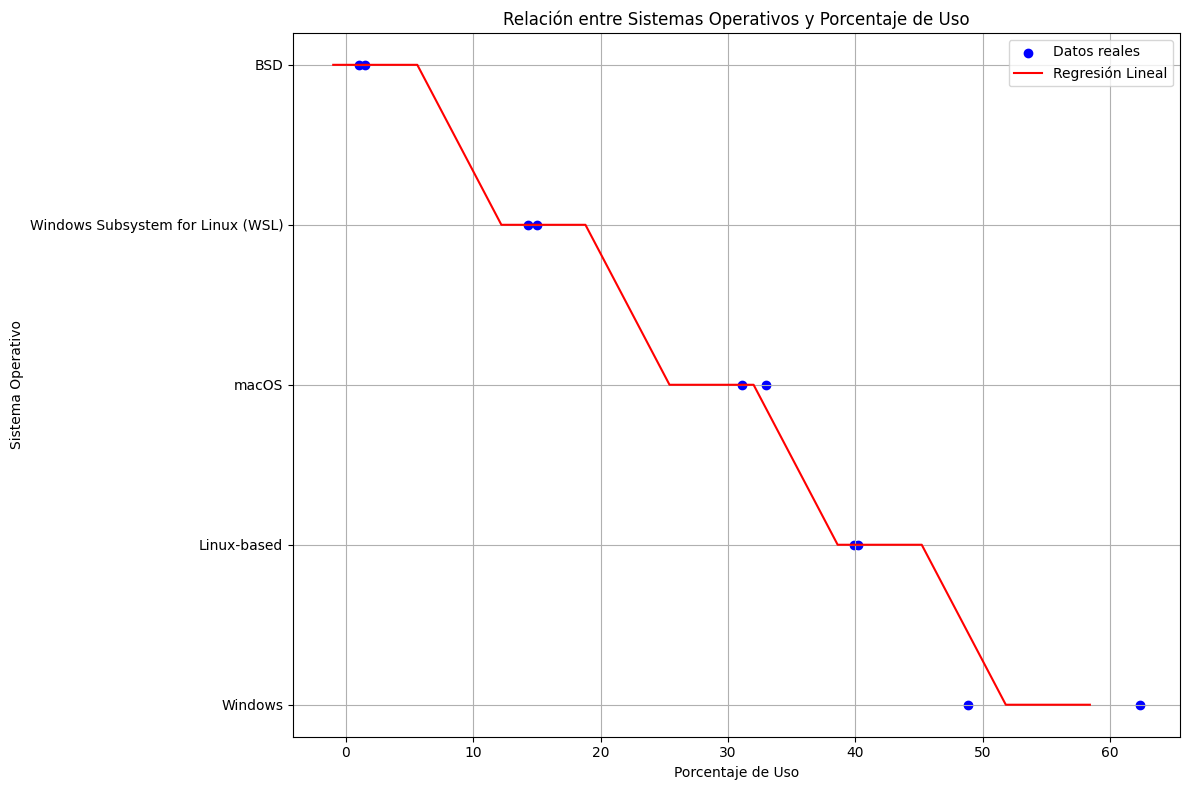

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Leer el archivo CSV con el separador ','
archivo_csv = "SistemaOperativo.csv"  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa
df = pd.read_csv(archivo_csv, sep=",")

# Verificar si hay valores NaN en las columnas
print(df.isnull().sum())

# Convertir "Porcentaje" a cadenas de texto y luego a números
df["Porcentaje"] = df["Porcentaje"].astype(str).str.rstrip('%').astype('float')

# Ordenar por "Porcentaje" y resetear el índice
df = df.sort_values(by="Porcentaje", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Crear variables independientes y dependientes para el modelo
X = df[["Ranking"]].values
y = df["Porcentaje"].values

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Analizar el modelo
pendiente = model.coef_[0]
intercepto = model.intercept_

# Imprimir análisis del modelo
print("\nAnálisis del Modelo de Regresión Lineal:")
print(f"- La pendiente del modelo (coeficiente) es: {pendiente:.2f}")
print(f"- El intercepto del modelo es: {intercepto:.2f}")
print("\nInterpretación del comportamiento:")
print(f"- El modelo muestra una relación entre el ranking de popularidad y el porcentaje de uso de los sistemas operativos.")
print(f"- El coeficiente de la pendiente ({pendiente:.2f}) sugiere que a medida que aumenta el ranking (menos popularidad), el porcentaje de uso disminuye.")
print(f"- El intercepto ({intercepto:.2f}) indica el valor estimado del porcentaje de uso cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.")

# Análisis más detallado según los datos
top_so = df.iloc[0]["Sistema Operativo"]
top_rating = df.iloc[0]["Porcentaje"]
bottom_so = df.iloc[-1]["Sistema Operativo"]
bottom_rating = df.iloc[-1]["Porcentaje"]

# Imprimir análisis más detallado
print("\nAnálisis más detallado:")
print(f"- El sistema operativo con mayor porcentaje de uso es {top_so} ({top_rating}%).")
print(f"- El sistema operativo con menor porcentaje de uso es {bottom_so} ({bottom_rating}%).")
print(f"- La regresión muestra una disminución progresiva en el porcentaje de uso a medida que disminuye el ranking.")
print(f"- El análisis sugiere que existe una correlación negativa entre el ranking y el porcentaje de uso. Esto es típico en listas de popularidad.")

# Configurar el gráfico con los nombres de los sistemas operativos en el eje Y
plt.figure(figsize=(12, 8))
plt.scatter(df["Porcentaje"], df["Sistema Operativo"], color="blue", label="Datos reales")
plt.plot(y_pred, df["Sistema Operativo"], color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Porcentaje de Uso")
plt.ylabel("Sistema Operativo")
plt.title("Relación entre Sistemas Operativos y Porcentaje de Uso")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()